# Program 2

In [54]:
from evaluator import evaluate, ast_helper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
i=2
fname='{}.daphne'.format(i)
exp = ast_helper(fname,directory='programs/')
%cat programs/2.daphne


(defn until-success [p n]
   (if (sample (flip p))
     n
     (until-success p (+ n 1))))

(let [p 0.01]
  (until-success p 0))


In [58]:
exp

['fn',
 ['alpha'],
 [['fn',
   ['alpha', 'until-success'],
   [['fn',
     ['alpha', 'p'],
     ['until-success', ['push-address', 'alpha', 'addr2'], 'p', 0]],
    ['push-address', 'alpha', 'addr1'],
    0.01]],
  ['push-address', 'alpha', 'addr0'],
  ['fn',
   ['alpha', 'p', 'n'],
   [['fn',
     ['alpha', 'p', 'n', 'until-success'],
     ['if',
      ['sample',
       ['push-address', 'alpha', 'addr4'],
       ['flip', ['push-address', 'alpha', 'addr5'], 'p']],
      'n',
      ['until-success',
       ['push-address', 'alpha', 'addr6'],
       'p',
       ['+', ['push-address', 'alpha', 'addr7'], 'n', 1],
       'until-success']]],
    ['push-address', 'alpha', 'addr3'],
    'p',
    'n',
    ['fn',
     ['alpha', 'p', 'n', 'until-success'],
     ['if',
      ['sample',
       ['push-address', 'alpha', 'addr8'],
       ['flip', ['push-address', 'alpha', 'addr9'], 'p']],
      'n',
      ['until-success',
       ['push-address', 'alpha', 'addr10'],
       'p',
       ['+', ['push-add

In [35]:
# ret = evaluate(exp, do_log=False)
# ret

tensor(81)

In [45]:
import sys
sys.setrecursionlimit(1000000)

In [46]:
%%time
n_samples=100000
samples = [evaluate(exp).item() for sample in range(n_samples)]
# 4.8s / 100 samples

CPU times: user 27min 45s, sys: 3.72 s, total: 27min 49s
Wall time: 27min 53s


Text(0.5, 1.0, '2.daphne \n n_samples 100000')

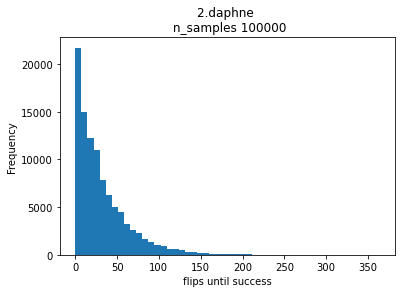

In [51]:
sr = pd.Series(samples)
sr.plot.hist(bins=50)
plt.xlabel('flips until success')
plt.title('{} \n n_samples {}'.format(fname,n_samples))

In [59]:
print('expectation w.r.t. the prior {:1.3f}'.format(sr.mean()))
print('std & var w.r.t. the prior {:1.3f} & {:1.1f}'.format(sr.std(),sr.var()))

expectation w.r.t. the prior 32.248
std & var w.r.t. the prior 32.717 & 1070.4


This is a standard textbook problem of a [Poisson process](https://en.wikipedia.org/wiki/Poisson_point_process#Interpreted_as_a_counting_process). It's the "arrival time" for an event with a characteristic rate. In MATH 318 Gordon Slade taught using examples of the “pizza delivery” or “when the bus comes” given a characteristic rate. In physics a classic example is radioactive decay.

The prior distribution is thus an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with rate parameter $\lambda=p=0.01$. The ground truth mean and std are thus $1/\lambda$.

In [65]:
p = 0.03
gt_mean = (1-p)/p
gt_std = np.sqrt(gt_mean/p)
gt_mean, gt_std
assert np.abs(gt_mean - sr.mean()) / gt_mean < 0.05
assert np.abs(gt_std - sr.std()) / gt_std < 0.05
